# Example related to DISCRETE COSINE TRANSFORM

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from skimage.metrics import structural_similarity as ssim
import os

### Example 1

With I is gray image

In [5]:
image_Path = r'D:\py\Digital_Image_Processing\Image\Image_for_Frequency\cameraman.tif' 
I =  cv2.imread(image_Path, cv2.IMREAD_GRAYSCALE)

##### S1 = DFT{I}; S2 = DCT{I}
##### Give alpha = 0.0001:
    T1(u, v) = S1(u, v), if |S1(u,v)| > alpha.max|S1|
    T1(u, v) = 0, rest

    T2(u, v) = S2(u, v), if |S2(u,v)| > alpha.max|S2|
    T2(u, v) = 0, rest

    Y1 = IDFT{T1}, Y2 = IDCT{T2}

    Display Y1, Y2 (real), compare with I and change alpha, give comments

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

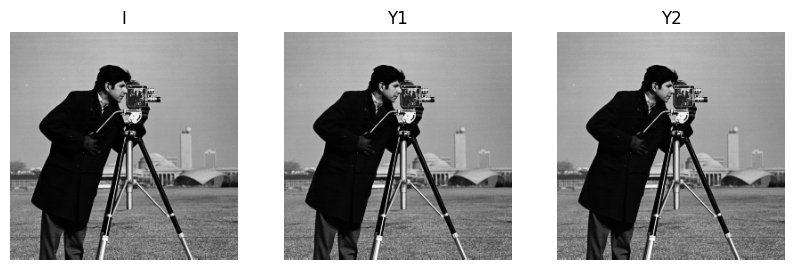

In [10]:
I = I.astype(np.float32)
S1 = np.fft.fftshift(np.fft.fft2(I))
S2 = cv2.dct(I)

a = 0.0001

T1 = np.zeros_like(S1, dtype=complex)
threshold_fft = a * np.max(np.abs(S1))

T1[np.abs(S1) > threshold_fft] = S1[np.abs(S1) > threshold_fft]


T2 = np.zeros_like(S2, dtype=np.float32)
threshold_dct = a * np.max(np.abs(S2))

T2[np.abs(S2) > threshold_dct] = S2[np.abs(S2) > threshold_dct]


Y1 = np.fft.ifft2(T1).real
Y2 = cv2.idct(T2)

plt.figure(figsize=(10, 12))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('I')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(Y1), cmap='gray')
plt.title('Y1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Y2, cmap='gray')
plt.title('Y2')
plt.axis('off')

    With N1 = #{p | T1(p) = 0}
    With N2 = #{p | T2(p) = 0}

    Compare N1, N2, change alpha and give comments

Zero pixels in T1 (FFT): 6499
Zero pixels in T2 (DCT): 14803


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

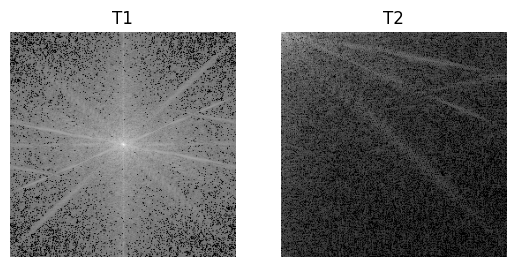

In [11]:
zero_count_T1 = np.size(T1) - np.count_nonzero(T1)
zero_count_T2 = np.size(T2) - np.count_nonzero(T2)

print(f"Zero pixels in T1 (FFT): {zero_count_T1}")
print(f"Zero pixels in T2 (DCT): {zero_count_T2}")

plt.subplot(1, 2, 1)
plt.imshow(np.log(1+np.abs(T1)), cmap='gray')
plt.title('T1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(1+np.abs(T2)), cmap='gray')
plt.title('T2')
plt.axis('off')